In [346]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [347]:
from sklearn.datasets import make_classification

In [348]:
x,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

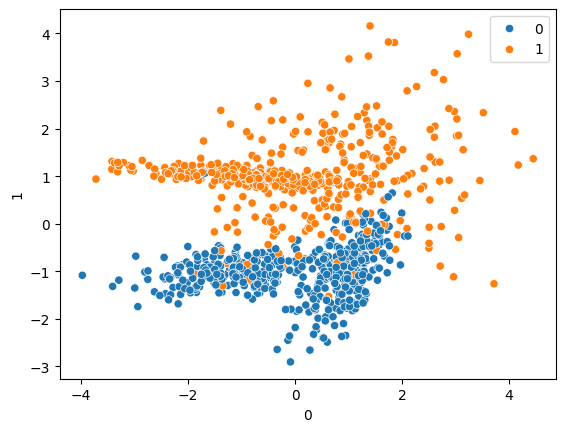

In [349]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [350]:
from sklearn.svm import SVC 

In [351]:
svc = SVC(kernel='rbf')

In [352]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=10)

In [353]:
svc.fit(x_train,y_train)

SVC()

In [354]:
y_pred = svc.predict(x_test)

In [355]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       153
           1       0.98      0.92      0.95       147

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[150   3]
 [ 12 135]]


In [356]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Relevant only for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5, 1.0]  # Relevant for 'poly' and 'sigmoid' kernels
}

# Initializing the SVC model
svc = SVC()

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fitting the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Making predictions
y_pred = grid_search.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Parameters: {'C': 1, 'coef0': 0.0, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       153
           1       0.98      0.93      0.95       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[150   3]
 [ 10 137]]
